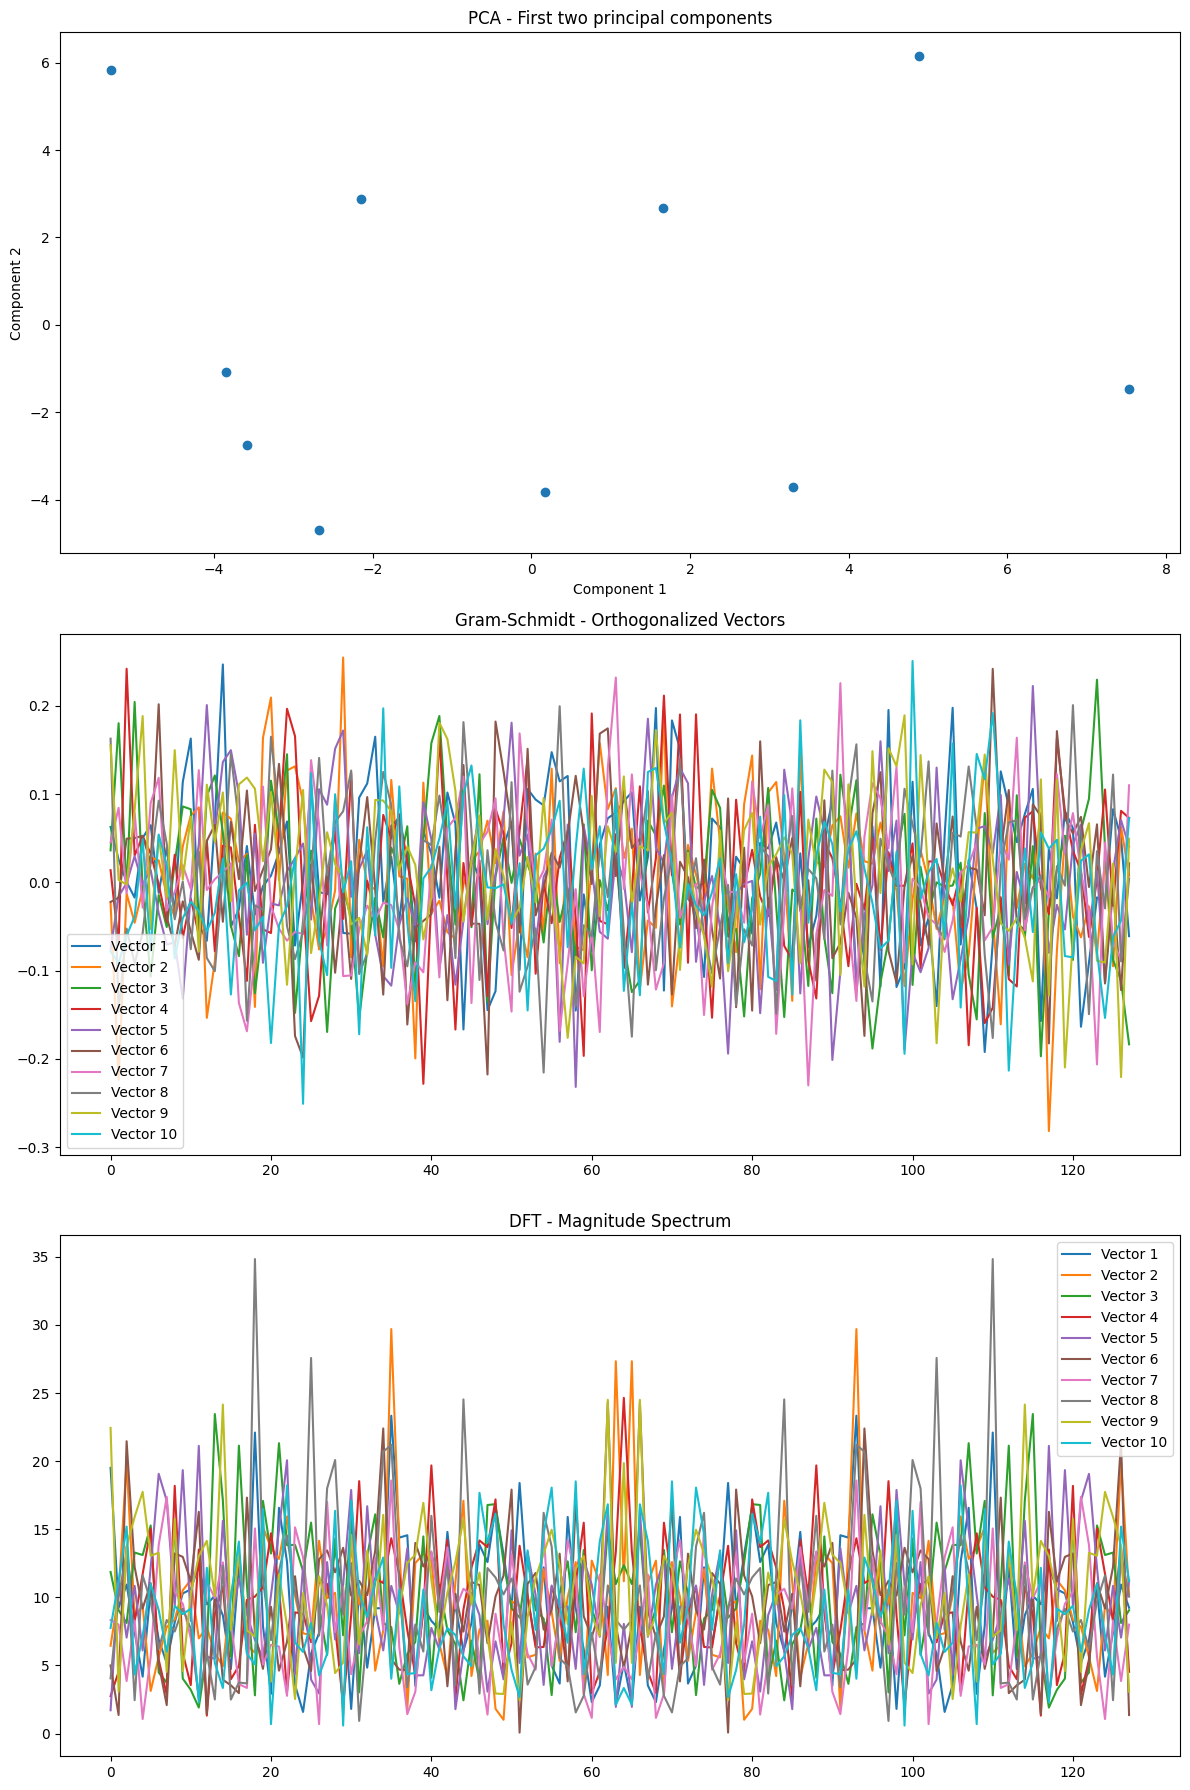

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from sklearn.decomposition import PCA

# Generate random Gaussian vectors
n_samples = 10
dim = 128
data = np.random.normal(0, 1, (n_samples, dim))

# Function for Gram-Schmidt Orthogonalization
def gram_schmidt(vectors):
    orthogonal = np.zeros_like(vectors)
    for i in range(len(vectors)):
        orthogonal[i] = vectors[i]
        for j in range(i):
            orthogonal[i] -= np.dot(orthogonal[j], vectors[i]) / np.dot(orthogonal[j], orthogonal[j]) * orthogonal[j]
        orthogonal[i] /= np.linalg.norm(orthogonal[i])
    return orthogonal

# PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_transformed = pca.fit_transform(data)

# Gram-Schmidt
gram_schmidt_transformed = gram_schmidt(data)

# DFT
dft_transformed = np.abs(fft(data, axis=1))

# Visualization
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# PCA Plot
ax[0].scatter(pca_transformed[:, 0], pca_transformed[:, 1])
ax[0].set_title('PCA - First two principal components')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')

# Gram-Schmidt Plot
for i in range(n_samples):
    ax[1].plot(gram_schmidt_transformed[i], label=f'Vector {i+1}')
ax[1].set_title('Gram-Schmidt - Orthogonalized Vectors')
ax[1].legend()

# DFT Plot
for i in range(n_samples):
    ax[2].plot(dft_transformed[i], label=f'Vector {i+1}')
ax[2].set_title('DFT - Magnitude Spectrum')
ax[2].legend()

plt.tight_layout()
plt.show()
